<a href="https://colab.research.google.com/github/haqinzmamul12/Addition-of-two-numbers-using-ML/blob/main/Dogs_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/ .kaggle/

cp: cannot stat 'kaggle.json': No such file or directory
cp: -r not specified; omitting directory '/root/'


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 150MB/s]
100% 1.06G/1.06G [00:09<00:00, 115MB/s]


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
#Adding Btach Norm and Dropout dependencies
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
'''Generators:when we have a large dataset so sometimes we were not having adequate RAM to handle the large data
in thi case we use Generators. It divides the large data into batches and once one batch executed that particular batch switch
with another fresh batch to be executed.
'''

'Generators:when we have a large dataset so sometimes we were not having adequate RAM to handle the large data \nin thi case we use Generators. It divides the large data into batches and once one batch executed that particular batch switch\nwith another fresh batch to be executed.\n'

In [ ]:
#Applying Generators
train =keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size =32,
    image_size =(256,256)
)
test =keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size =32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalise the data in the range(0 to 1)
def process(image,label):
  tf.cast(image/255. , tf.float32)
  return image,label

train =train.map(process)
test =test.map(process)

In [17]:
model =Sequential()
model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding ='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding ='valid'))

model.add(Flatten())

model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation ='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from keras.callbacks import EarlyStopping
early_stopping_callback =EarlyStopping(monitor ='val_loss',patience =5,restore_best_weights =True)

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics =['accuracy'])

In [23]:
history =model.fit(train,epochs=8,validation_data=test,callbacks=[early_stopping_callback])

Epoch 1/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.5422 - loss: 2.5627 - val_accuracy: 0.4982 - val_loss: 0.6933
Epoch 2/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.5659 - loss: 0.6652 - val_accuracy: 0.6242 - val_loss: 0.6207
Epoch 3/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.6447 - loss: 0.6182 - val_accuracy: 0.7108 - val_loss: 0.5560
Epoch 4/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.7104 - loss: 0.5625 - val_accuracy: 0.7440 - val_loss: 0.5319
Epoch 5/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.7531 - loss: 0.4936 - val_accuracy: 0.7724 - val_loss: 0.5172
Epoch 6/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.7800 - loss: 0.4398 - val_accuracy: 0.7490 - val_loss: 0.5171
Epoch 7/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8054 - loss: 0.3912 - val_accuracy: 0.8010 - val_loss: 0.4570
Epoch 8/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8236 - loss: 0.3490 - val_accu

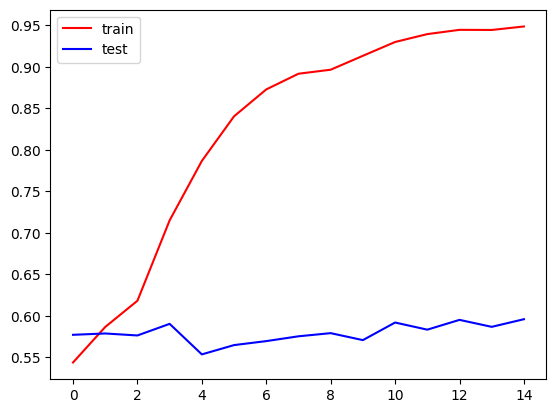

In [12]:
#Before tuning
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='test')
plt.legend()
plt.show()

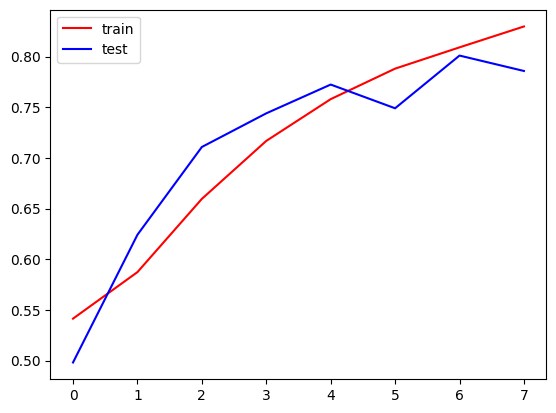

In [24]:
#After Tuning
plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='test')
plt.legend()
plt.show()

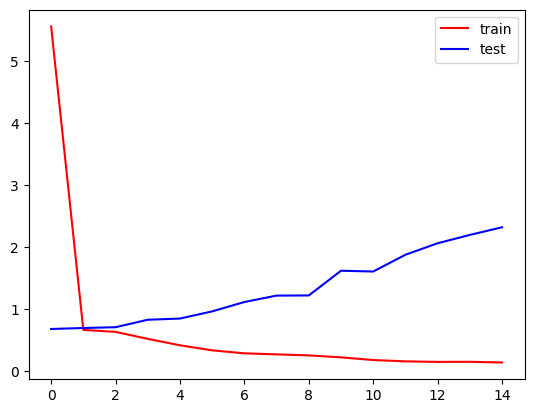

In [13]:
#Before tuning
plt.plot(history.history['loss'],color ='red',label ='train')
plt.plot(history.history['val_loss'],color ='blue',label ='test')
plt.legend()
plt.show()

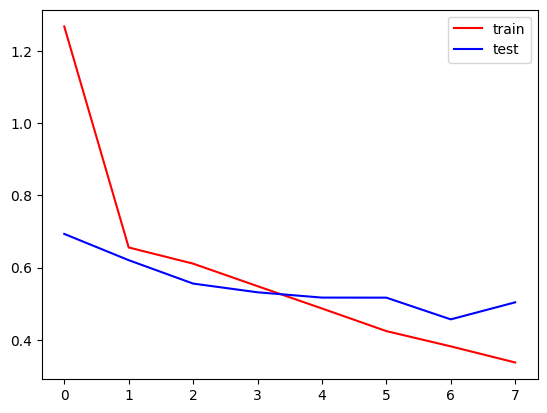

In [25]:
#After Tuning
plt.plot(history.history['loss'],color ='red',label ='train')
plt.plot(history.history['val_loss'],color ='blue',label ='test')
plt.legend()
plt.show()

#Ways to reduce overfitting:
    1.Add more data
    2.Data Augmentation
    3.L1/L2 Regularisation
    4.Dropout
    5.Batch Norm
    6.Reduce Complexity

In [ ]:
#Applying Batch Normalisation and Dropout technique to reduce overfitting


AttributeError: '_MapDataset' object has no attribute 'shape'